In [9]:
from __future__ import print_function
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
%matplotlib inline

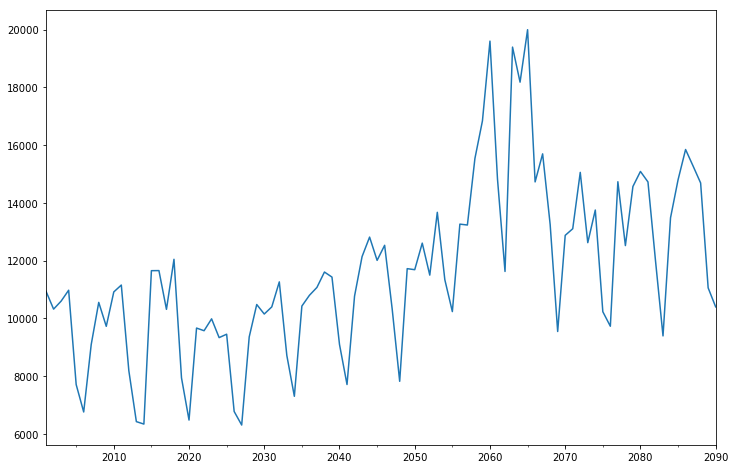

In [20]:
dta=[10930,10318,10595,10972,7706,6756,9092,10551,9722,10913,11151,8186,6422, 
6337,11649,11652,10310,12043,7937,6476,9662,9570,9981,9331,9449,6773,6304,9355, 
10477,10148,10395,11261,8713,7299,10424,10795,11069,11602,11427,9095,7707,10767, 
12136,12812,12006,12528,10329,7818,11719,11683,12603,11495,13670,11337,10232, 
13261,13230,15535,16837,19598,14823,11622,19391,18177,19994,14723,15694,13248, 
9543,12872,13101,15053,12619,13749,10228,9725,14729,12518,14564,15085,14722, 
11999,9390,13481,14795,15845,15271,14686,11054,10395]
dta = pd.Series(dta)
dta.index = pd.date_range(start='2001-01-01', end='2091-01-01', freq='A')
dta.plot(figsize=(12,8))

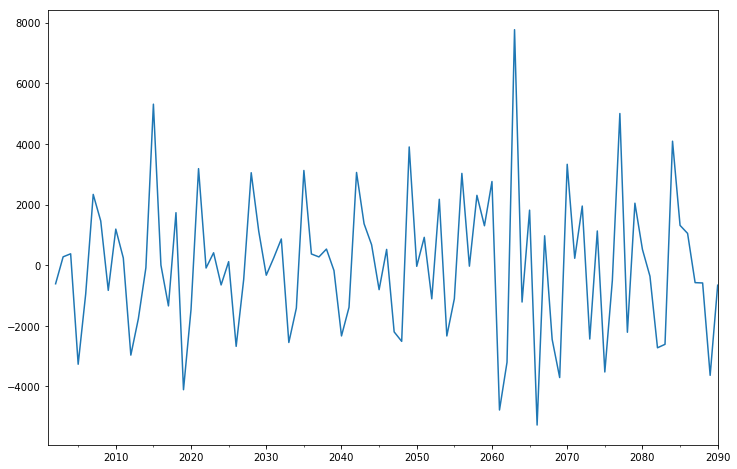

In [11]:
fig = plt.figure(figsize=(12, 8))
ax1= fig.add_subplot(111)
diff1 = dta.diff(1)
diff1.plot(ax=ax1)

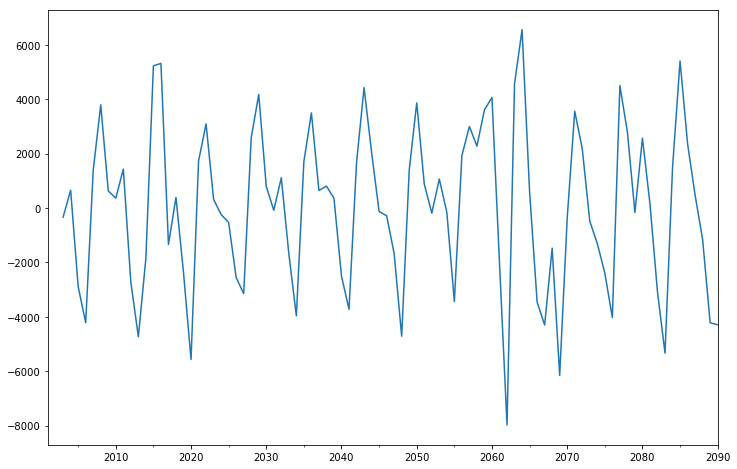

In [12]:
fig = plt.figure(figsize=(12, 8))
ax1= fig.add_subplot(111)
diff1 = dta.diff(2)
diff1.plot(ax=ax1)

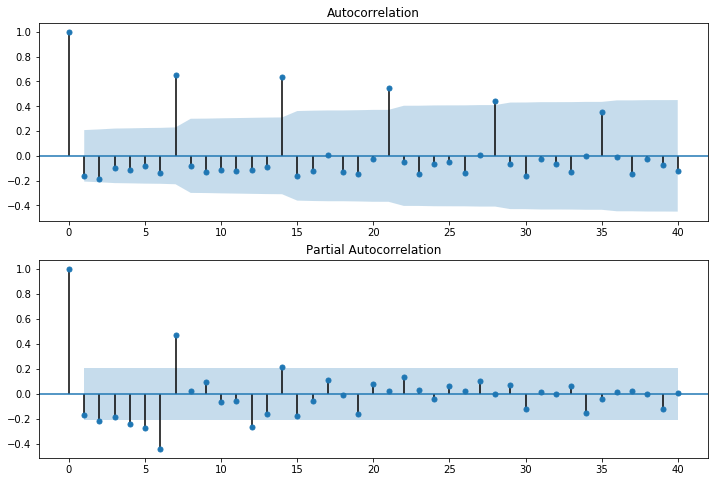

In [21]:
dta= dta.diff(1)[1:]
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax2)

In [22]:
arma_mod20 = sm.tsa.ARMA(dta,(7,0)).fit()
print(arma_mod20.aic,arma_mod20.bic,arma_mod20.hqic)
arma_mod30 = sm.tsa.ARMA(dta,(0,1)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)
arma_mod40 = sm.tsa.ARMA(dta,(7,1)).fit()
print(arma_mod40.aic,arma_mod40.bic,arma_mod40.hqic)
arma_mod50 = sm.tsa.ARMA(dta,(8,0)).fit()
print(arma_mod50.aic,arma_mod50.bic,arma_mod50.hqic)

1579.70255477 1602.1002821 1588.7304359
1632.32037332 1639.78628243 1635.32966703
1581.09160559 1605.97796928 1591.12258462
1581.39578363 1606.28214733 1591.42676266


aic/bic/hqic 越小越好，股选择ARMA（7,0）

## 模型检验
在指数平滑模型下，观察ARIMA模型的残差是否是平均值为0且方差为常数的正态分布（服从零均值、方差不变的正态分布），同时也要观察连续残差是否（自）相关。

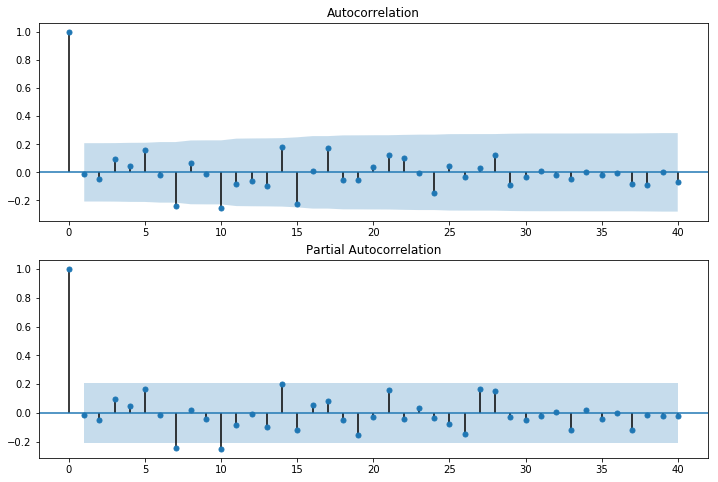

In [24]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arma_mod20.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_mod20.resid, lags=40, ax=ax2)

In [26]:
arma_mod20.resid.mean()/arma_mod20.resid.std()

-0.02325004728880675

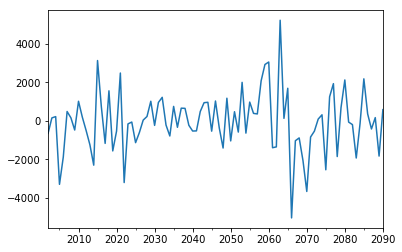

In [27]:
arma_mod20.resid.plot()

## 做D-W检验
德宾-沃森（Durbin-Watson）检验。德宾-沃森检验,简称D-W检验，是目前检验自相关性最常用的方法，但它只使用于检验一阶自相关性。因为自相关系数ρ的值介于-1和1之间，所以 0≤DW≤４。并且DW＝0 -＞ρ＝１　　 即存在正自相关性 
DW＝４-＞ρ＝－１　即存在负自相关性 
DW＝２-＞ρ＝０　　即不存在（一阶）自相关性 
因此，当DW值显著的接近于0或４时，则存在自相关性，而接近于２时，则不存在（一阶）自相关性。这样只要知道ＤＷ统计量的概率分布，在给定的显著水平下，根据临界值的位置就可以对原假设$Ｈ_０$进行检验。

In [28]:
print(sm.stats.durbin_watson(arma_mod20.resid.values))

2.0242446545


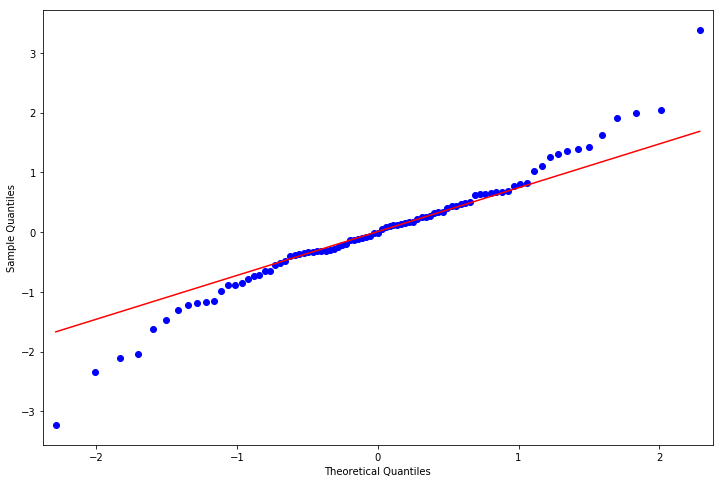

In [29]:
resid = arma_mod20.resid#残差
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

## Ljung-Box检验
Ljung-Box test是对randomness的检验,或者说是对时间序列是否存在滞后相关的一种统计检验。对于滞后相关的检验，我们常常采用的方法还包括计算ACF和PCAF并观察其图像，但是无论是ACF还是PACF都仅仅考虑是否存在某一特定滞后阶数的相关。LB检验则是基于一系列滞后阶数，判断序列总体的相关性或者说随机性是否存在。 
时间序列中一个最基本的模型就是高斯白噪声序列。而对于ARIMA模型，其残差被假定为高斯白噪声序列，所以当我们用ARIMA模型去拟合数据时，拟合后我们要对残差的估计序列进行LB检验，判断其是否是高斯白噪声，如果不是，那么就说明ARIMA模型也许并不是一个适合样本的模型。

In [32]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
table.set_index('lag')
table[:20]

,lag,AC,Q,Prob(>Q)
0,1.0,-0.014445,0.019203,0.889786
1,2.0,-0.047441,0.228721,0.891936
2,3.0,0.097778,1.129070,0.770061
3,4.0,0.047514,1.344176,0.853837
4,5.0,0.156219,3.697163,0.593786
5,6.0,-0.017855,3.728271,0.713392
6,7.0,-0.241230,9.475791,0.220276
7,8.0,0.068078,9.939199,0.269319
8,9.0,-0.012041,9.953877,0.354232
9,10.0,-0.256684,16.708523,0.081068


检验的结果就是看最后一列前十二行的检验概率（一般观察滞后1~12阶），如果检验概率小于给定的显著性水平，比如0.05、0.10等就拒绝原假设，其原假设是相关系数为零。就结果来看，如果取显著性水平为0.05，那么相关系数与零没有显著差异，即为白噪声序列。

2090-12-31   -1236.083285
2091-12-31    3548.992310
2092-12-31    1236.666272
2093-12-31     649.934494
2094-12-31    -530.533586
2095-12-31    -611.704144
2096-12-31   -2290.227075
2097-12-31    -726.547090
2098-12-31    2740.832862
2099-12-31     952.977398
2100-12-31     277.201372
Freq: A-DEC, dtype: float64


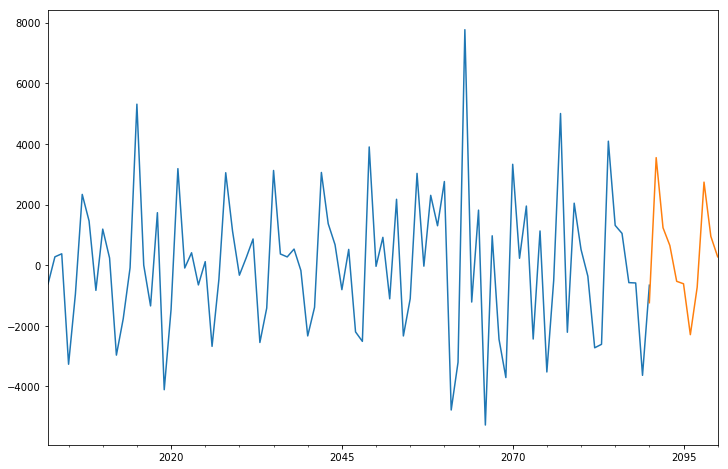

In [34]:
predict_sunspots = arma_mod20.predict('2090', '2100', dynamic=True)
print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.loc['2001':].plot(ax=ax)
predict_sunspots.plot(ax=ax)

In [35]:
pd.ewma?